# Problem statement 

- This dataset is created for prediction of the S&P 500 stock index based on interest rates and employment numbers.


# LIBRARIES IMPORT 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORT DATASET 

In [2]:
dataset = pd.read_csv('dataset/S&P500_Stock_Data.csv')

In [3]:
dataset.head(10)

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
5,2.143637,56.060598,2187.344909
6,2.148647,51.513208,2263.049249
7,2.176184,53.475909,2281.496374
8,2.125352,63.668422,2355.163011
9,2.225682,56.993396,2326.330337


In [4]:
dataset.tail(10)

,Interest Rates,Employment,S&P 500 Price
990,2.018200,56.929616,2206.946180
991,1.936748,52.967524,2086.159182
992,2.591529,57.281030,2686.211789
993,1.740441,55.098645,1922.893274
994,1.868835,60.543377,2065.424594
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981
999,2.180638,46.297034,2156.133786


In [5]:
dataset.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764327
max,3.000000,70.000000,3000.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


# VISUALIZE DATASET

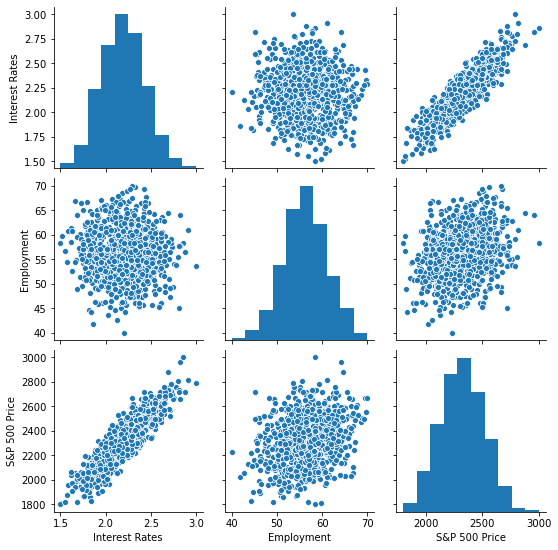

In [7]:
sns.pairplot(dataset)

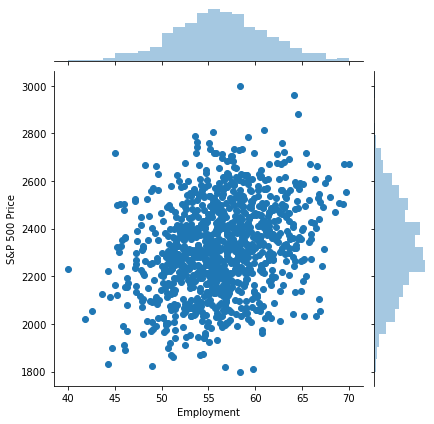

In [8]:
sns.jointplot(x = 'Employment', y = 'S&P 500 Price', data = dataset)

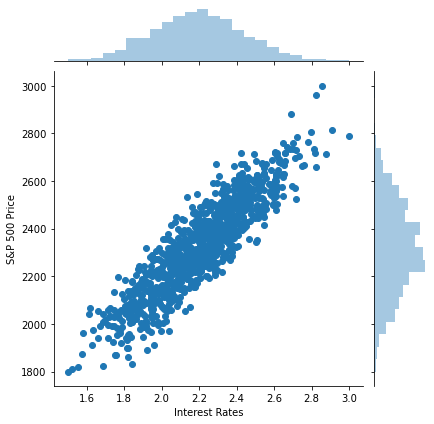

In [9]:
sns.jointplot(x = 'Interest Rates', y = 'S&P 500 Price', data = dataset)

# CREATE TESTING AND TRAINING DATASET

In [10]:
X = dataset[['Interest Rates', 'Employment']]
y = dataset['S&P 500 Price']

print(X)
print(y)

     Interest Rates  Employment
0          1.943859   55.413571
1          2.258229   59.546305
2          2.215863   57.414687
3          1.977960   49.908353
4          2.437723   52.035492
..              ...         ...
995        2.528420   52.390828
996        2.643571   54.626204
997        2.009644   57.004357
998        2.201656   62.447790
999        2.180638   46.297034

[1000 rows x 2 columns]
0      2206.680582
1      2486.474488
2      2405.868337
3      2140.434475
4      2411.275663
          ...     
995    2578.699184
996    2573.865933
997    2004.911218
998    2344.098981
999    2156.133786
Name: S&P 500 Price, Length: 1000, dtype: float64


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(X_train, y_train)
print(X_test, y_test)

     Interest Rates  Employment
166        2.762527   54.002081
875        2.363325   56.175105
417        2.317700   55.433041
656        2.604189   52.857299
7          2.176184   53.475909
..              ...         ...
664        2.036196   50.152333
489        2.230395   63.427193
364        2.237968   62.008703
265        2.104577   57.977354
219        1.809790   54.547848

[700 rows x 2 columns] 166    2666.551254
875    2395.212443
417    2448.012282
656    2600.759190
7      2281.496374
          ...     
664    2171.164097
489    2390.633533
364    2432.116523
265    2258.252471
219    1939.222258
Name: S&P 500 Price, Length: 700, dtype: float64
     Interest Rates  Employment
218        1.861335   41.854939
605        1.805790   59.069522
160        1.712212   56.735535
452        1.901344   53.528426
807        2.047518   57.988708
..              ...         ...
38         2.035761   58.206336
869        2.170327   58.824573
110        2.180296   62.900853
729        2.1

# TRAINING THE MODEL 

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
print('Linear Model Coefficient (m):', model.coef_)
print('Linear Model Coefficient (b):', model.intercept_)

Linear Model Coefficient (m): [728.53893934  12.5939464 ]
Linear Model Coefficient (b): 10.031894148225547


# EVALUATING THE MODEL

In [16]:
y_pred = model.predict(X_test)

print(y_pred)

[1893.20568609 2069.53888633 1971.96946525 2069.3693251  2232.03551221
 2285.57987472 2576.77599103 2651.05309647 2671.50049589 2451.78239549
 2511.03719436 2477.23976918 2073.21266132 2492.72333799 2300.14254437
 2699.83646323 2726.0125573  2363.2463813  2182.27087792 2312.8208643
 2298.08798939 2308.67414378 2416.74810893 2411.24285467 2096.80427924
 2153.84575558 2406.52394005 2401.6762932  2477.24180756 2381.00581503
 2272.05507436 2363.06717131 2519.32259114 2357.08721769 2622.18508595
 2444.12433983 2431.79251822 2358.57741833 1987.79669654 2591.86662872
 2459.69676384 2870.84156787 2518.68660943 2424.94609359 1963.9719912
 2629.94380779 1858.28151494 2342.18203932 2443.78311468 2295.97787655
 2237.17336157 2372.15798267 2133.39610555 2458.33178609 2416.67558087
 2273.58903049 2098.57489777 2271.19055565 2159.22144844 2410.37340223
 2599.53720046 2184.32689994 2435.61962969 2208.98076766 2462.66199212
 2202.35272558 2435.80092773 2329.23592629 2556.3383715  1896.54173731
 2383.30

Text(0.5, 1.0, 'Multiple Linear Regression predictions')

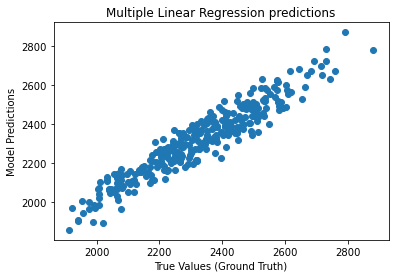

In [17]:
plt.scatter(y_test, y_pred)
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Linear Regression predictions')

In [18]:
k = X_test.shape[1]
n = len(X_test)

print('k =', k, '\nn =', n)

k = 2 
n = 300


In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [20]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y_test-y_pred)/y_test ) )*100

print('RMSE =', RMSE)
print('MSE =', MSE)
print('MAE =', MAE)
print('R2 =', r2)
print('adj_r2 =', adj_r2)
print('MAPE =', MAPE)

RMSE = 60.221
MSE = 3626.556262833922
MAE = 49.858270465069694
R2 = 0.8979024797719479
adj_r2 = 0.8972149543832069
MAPE = 2.1380834387973726


20% Testing data, 80% Training data

- RMSE = 62.032
- MSE = 3847.984681412707
- MAE = 51.21216398483923
- R2 = 0.8924043223043406
- adj_r2 = 0.891311980398801
- MAPE = 2.23886003422435

# VISUALIZE THE RESULTS 

In [21]:
from mpl_toolkits.mplot3d import Axes3D
#X = dataset[['Interest Rates', 'Employment']]
#y = dataset['S&P 500 Price']

In [22]:
x_surf, y_surf = np.meshgrid(
    np.linspace(
        dataset['Interest Rates'].min(),
        dataset['Interest Rates'].max(),
        100
    ),
    np.linspace(
        dataset['Employment'].min(),
        dataset['Employment'].max(),
        100
    )
)

print(x_surf.shape)
print(y_surf.shape)

(100, 100)
(100, 100)


In [23]:
only_X = pd.DataFrame({'Interest Rates': x_surf.ravel(), 'Employment': y_surf.ravel()})

only_X.shape

(10000, 2)

In [24]:
fitted_y = model.predict(only_X)

print(fitted_y.shape)

(10000,)


In [25]:
fitted_y = fitted_y.reshape(x_surf.shape)

print(fitted_y.shape)

(100, 100)


Text(0.5, 0, 'Stock Index Price')

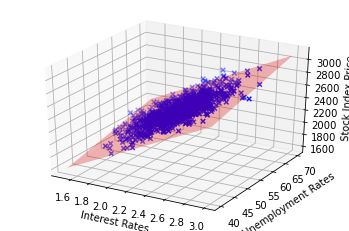

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(
    dataset['Interest Rates'],
    dataset['Employment'],
    dataset['S&P 500 Price'],
    marker = 'x',
    color = 'blue'
)
ax.plot_surface(x_surf, y_surf, fitted_y, color = 'red', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock Index Price')

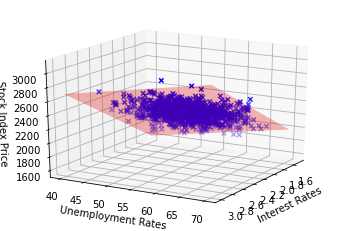

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(
    dataset['Interest Rates'],
    dataset['Employment'],
    dataset['S&P 500 Price'],
    marker = 'x',
    color = 'blue'
)
ax.plot_surface(x_surf, y_surf, fitted_y, color = 'red', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock Index Price')
ax.view_init(20, 30)
plt.show()

In [28]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])

print(coeff_df)

                Coefficient
Interest Rates   728.538939
Employment        12.593946
